In [1]:
from network import Network
import fonts as f
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import time
import pickle

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(10, 10))
plt.rc('figure', facecolor=(1, 1, 1, 1))


In [2]:
rng = np.random.RandomState(17)


def add_noise(x, p):
    rand = rng.uniform(0, 1, IN.shape)
    rand = np.where(rand < p, 1, 0)
    return np.abs(x-rand)


In [3]:
font = f.f2
labels = f.font2_labels
dataset = np.array([[x.flatten(), x.flatten()] for x in font])
dataset = dataset[0:10]
labels = labels[0:10]

noise = []
iters = 3
for i in range(iters):
    for IN, OUT in dataset:
        noise.append([add_noise(IN, 0.1), OUT])

network = Network(structure=[35, 55, 35], activation=[
    "lineal", "sigmoid"], seed=17)


In [4]:
errors = []
iteration = 0
tmp = time.time()


def callback(x):
    global iteration
    global tmp
    t = time.time()
    err = network.error(dataset)
    print("\riter: {} time:{:.2f} error:{:.2e}".format(
        iteration, t-tmp, err), end="")
    tmp = t
    iteration += 1
    network.reconstruct(x)
    errors.append(err)


In [5]:
network.train(dataset, max_iter=700, callback=callback)


iter: 3 time:11.31 error:2.86e-03

In [6]:
with open("weights-1b-{}.pkl".format(time.time()), "wb") as file:
    pickle.dump(network.w, file)

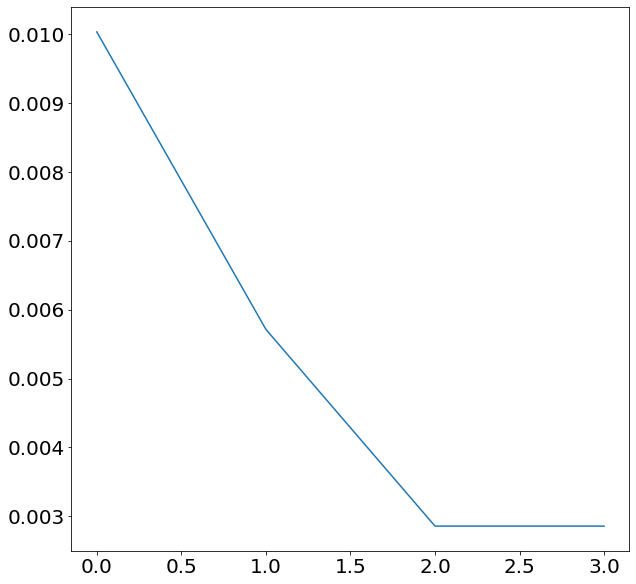

In [7]:
plt.figure("error")
plt.plot(errors)

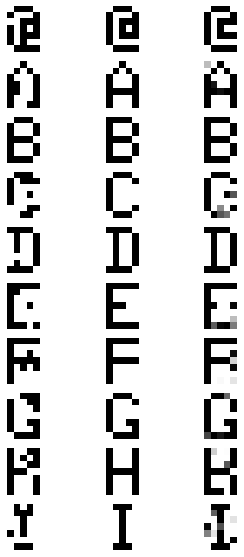

In [15]:
plt.figure("abc", figsize=(5, 10))

noise =[]
for IN, OUT in dataset:
    noise.append([add_noise(IN, 0.1), OUT])

for i, row in enumerate(noise):
    letter = row[0]
    expected = row[1]
    plt.subplot(len(noise), 3, i*3+1)
    plt.imshow(letter.reshape(7, 5), cmap="binary")
    plt.gca().set_axis_off()
    plt.subplot(len(noise), 3, i*3+2)
    plt.imshow(expected.reshape(7, 5), cmap="binary")
    plt.gca().set_axis_off()
    plt.subplot(len(noise), 3, i*3+3)
    letter = network.feedforward(letter)
    plt.imshow(letter.reshape(7, 5), cmap="binary")
    plt.gca().set_axis_off()
plt.show()


In [9]:
def draw_latent():
    data = np.array([network.encode(x[0]) for x in dataset])
    plt.scatter(data[:, 0], data[:, 1], s=0)
    for l, p in zip(labels, data):
        plt.annotate(l, (p[0], p[1]), fontsize=30,
                     ha="center", va="center", color="blue")

    plt.xlabel("latent 1")
    plt.ylabel("latent 2")
    return data


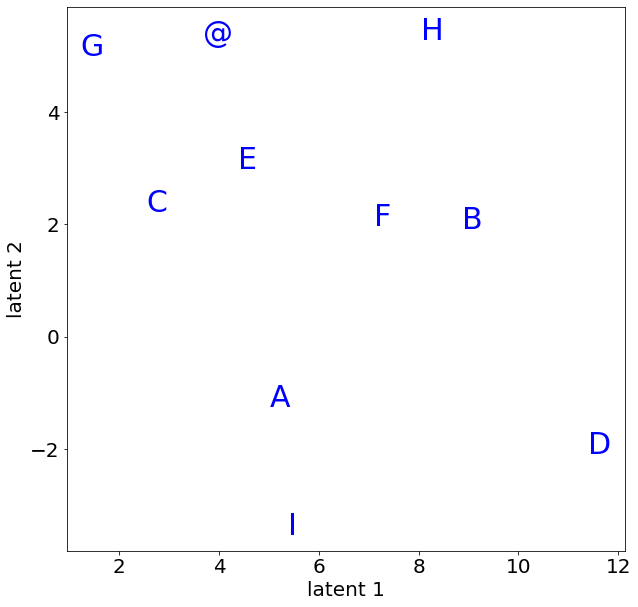

In [10]:
plt.figure("latent")
latent = draw_latent()
plt.show()


In [11]:
def mean_error(iters=10, level=0.1):
    noise_d = []
    for i in range(iters):
        for IN, OUT in dataset:
            n = add_noise(IN, level)
            noise_d.append([n, OUT])
    return network.error(noise_d)


Text(0, 0.5, 'error')

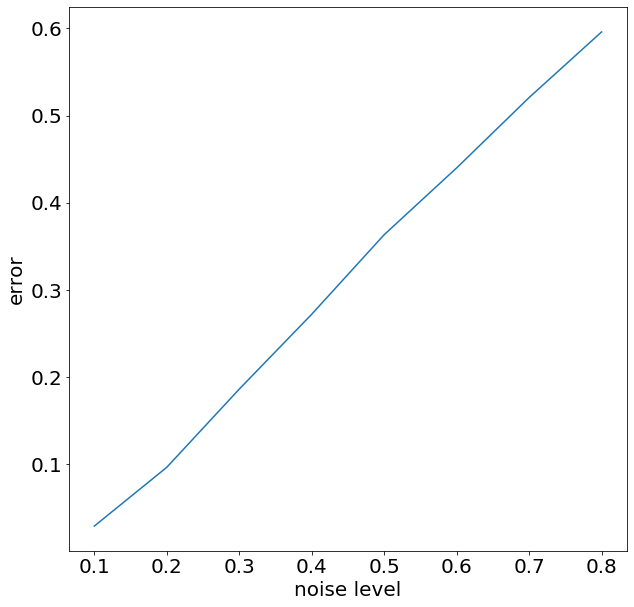

In [12]:
levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
errors = []
for level in levels:
    errors.append(mean_error(100, level))
plt.plot(levels,errors)
plt.xlabel("noise level")
plt.ylabel("error")

In [13]:
def compute_errors(iters=10, level=0.1):
    errors = []
    for i in range(iters):
        for IN, OUT in dataset:
            n = add_noise(IN, level)
            errors.append(network.error([[n, OUT]]))
    return errors


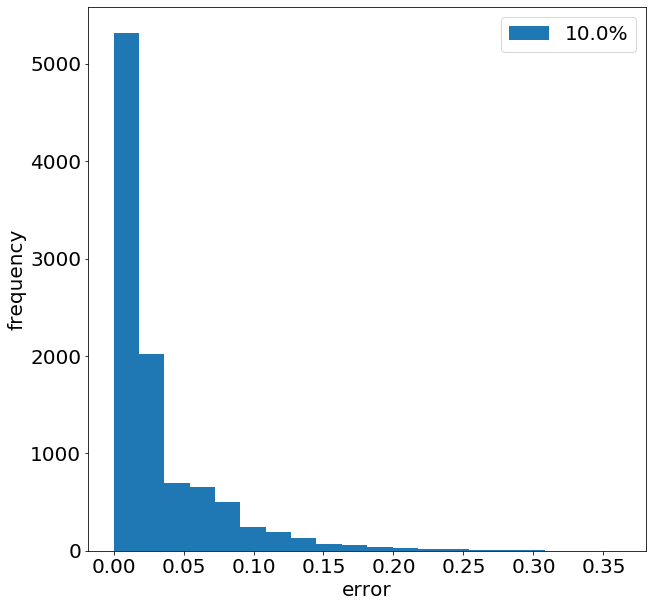

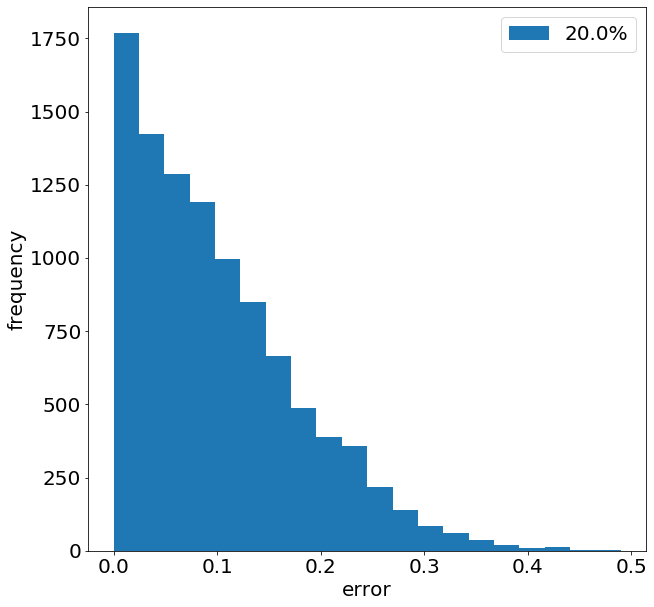

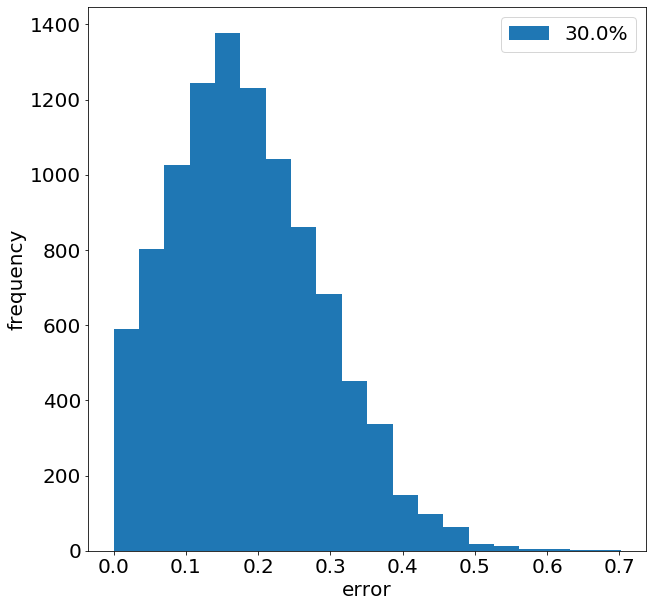

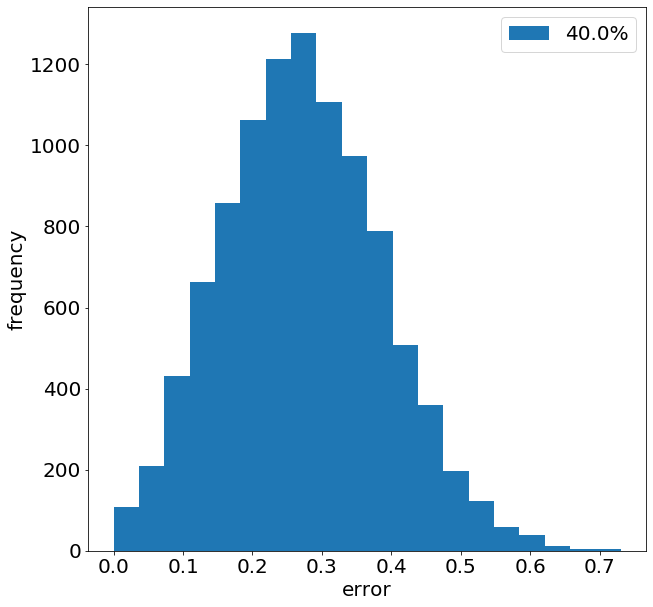

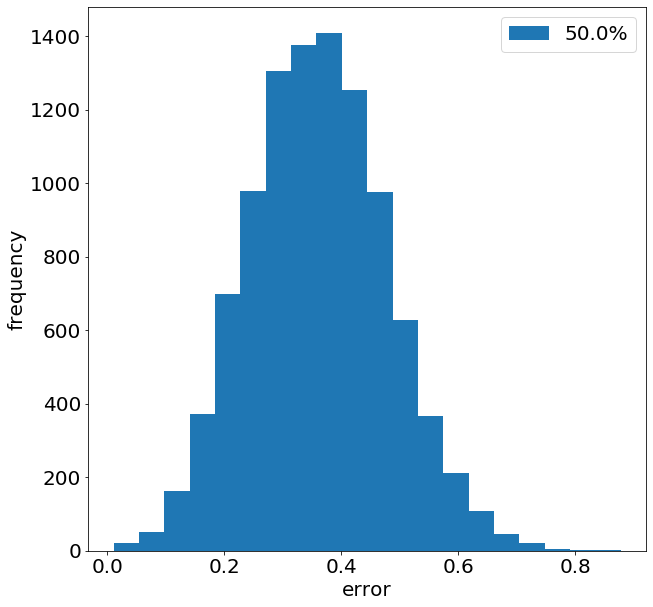

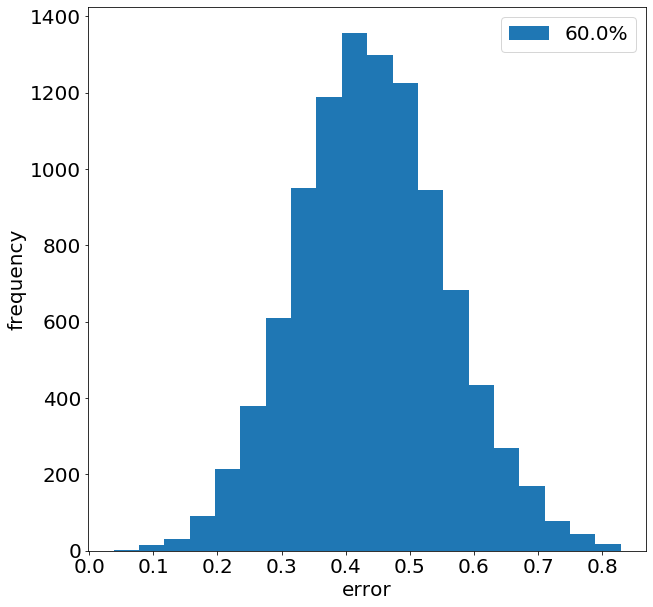

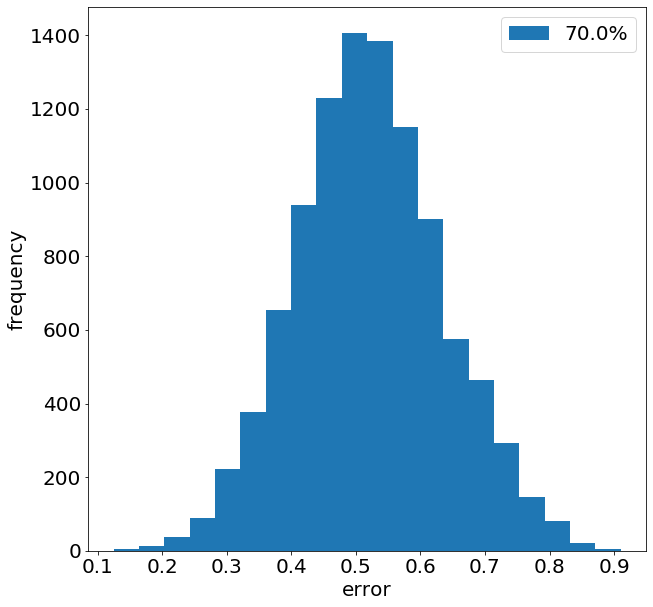

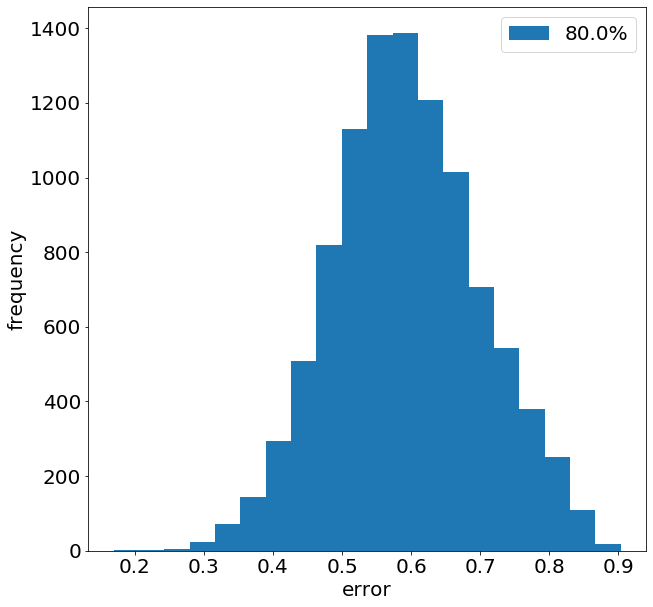

In [14]:
levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
errors = []
for level in levels:
    plt.figure("error-{}".format(level))
    plt.hist(compute_errors(1000, level), bins=20, label=f"{level*100}%")
    plt.legend()
    plt.xlabel("error")
    plt.ylabel("frequency")